<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/vgg19_fruits02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [4]:
test_path = '/content/fruits_v2/test'
train_path = '/content/fruits_v2/train'
val_path = '/content/fruits_v2/val'

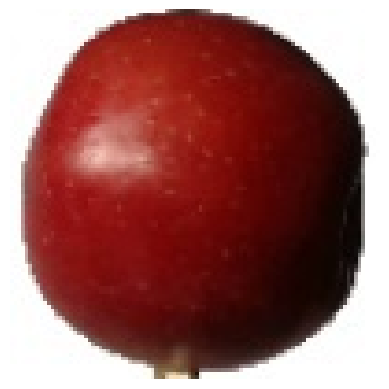

In [5]:
img = load_img(train_path + "/Apple Braeburn/Apple Braeburn_0.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [6]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [7]:
numberOfClass = len(glob(train_path + "/*"))
numberOfClass

33

In [8]:
vgg = VGG16()

In [9]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
print(type(vgg))

<class 'keras.src.engine.functional.Functional'>


In [11]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.src.engine.input_layer.InputLayer object at 0x7b9a00f495a0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9977ca0af0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9977ca1270>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b9977ca1ff0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9977ca2860>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9977ca2bc0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b9974bc80d0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9977ca38b0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9974bc8b50>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9974bc96c0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7b9974bcab30>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9974bcb3a0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7b9974bcb700>, <keras.src.layers.convolutional.co

In [12]:
len(vgg_layer_list)

23

In [13]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [15]:
for layers in model.layers:
    layers.trainable = False

model.add(Dense(numberOfClass, activation = "softmax"))

print(model.summary())

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [16]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), class_mode='categorical')
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), class_mode='categorical')
batch_size = 32

Found 11787 images belonging to 33 classes.
Found 1706 images belonging to 33 classes.


In [17]:
hist = model.fit_generator(train_data,
                          steps_per_epoch = 1600 // batch_size,
                          epochs =5,
                          validation_data = test_data,
                          validation_steps = 800 // batch_size)

<ipython-input-17-9cfec1afa19a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/5
50/50 [==============================] - 1461s 29s/step - loss: 1.1502 - accuracy: 0.7844 - val_loss: 0.2328 - val_accuracy: 0.9237
Epoch 2/5
50/50 [==============================] - 1403s 28s/step - loss: 0.1040 - accuracy: 0.9702 - val_loss: 0.1158 - val_accuracy: 0.9650
Epoch 3/5
50/50 [==============================] - 1448s 29s/step - loss: 0.0479 - accuracy: 0.9862 - val_loss: 0.0089 - val_accuracy: 0.9962
Epoch 4/5
50/50 [==============================] - 1448s 29s/step - loss: 0.0183 - accuracy: 0.9962 - val_loss: 0.0192 - val_accuracy: 0.9962
Epoch 5/5
50/50 [==============================] - 1441s 29s/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 9.5710e-04 - val_accuracy: 1.0000


In [18]:
model.save_weights("model_fruits_v2.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


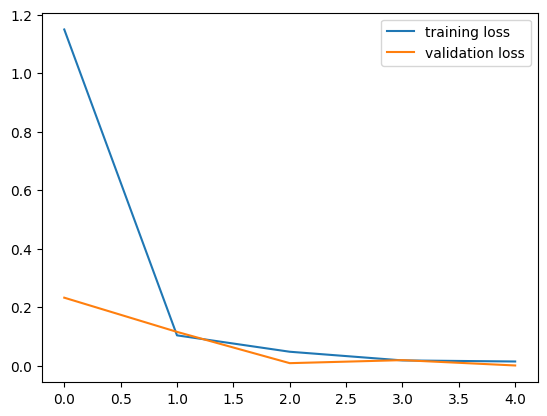

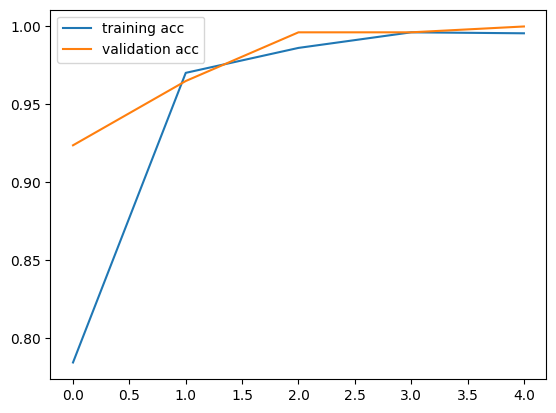

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "training loss")
plt.plot(hist.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "training acc")
plt.plot(hist.history["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()
plt.figure()

In [20]:
import json, codecs

with open("model_model_fruits_v2.json","w") as f:
    json.dump(hist.history,f)

In [21]:
with codecs.open("model_model_fruits_v2.json","r",encoding= "utf-8") as f:
    n = json.loads(f.read())

In [22]:
with codecs.open("model_model_fruits_v2.json","r",encoding= "utf-8") as f:
    n = json.loads(f.read())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


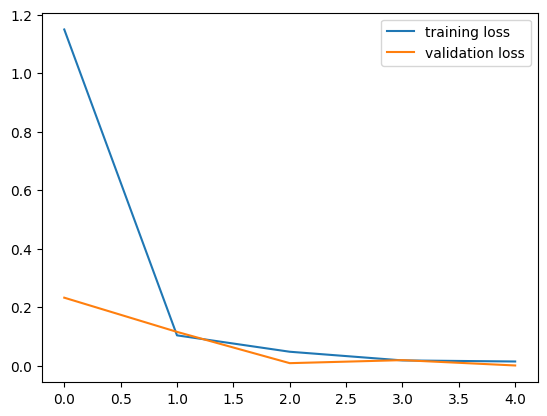

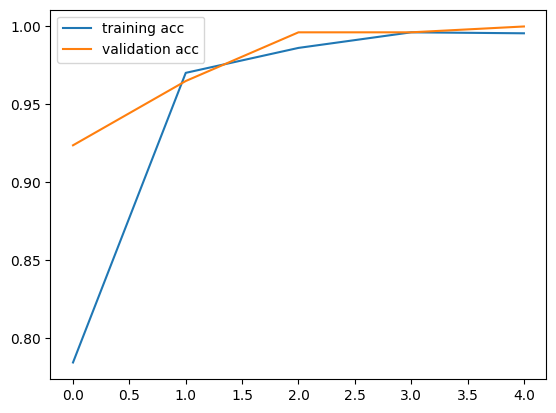

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [23]:
print(hist.history.keys())
plt.plot(n["loss"], label = "training loss")
plt.plot(n["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(n["accuracy"], label = "training acc")
plt.plot(n["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()
plt.figure()

In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Valores reais e previsões (exemplo)
valores_reais = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
previsoes = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

# Criar a matriz de confusão
matriz_confusao = confusion_matrix(valores_reais, previsoes)

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)

Matriz de Confusão:
[[3 2]
 [1 4]]


In [5]:
from sklearn.metrics import confusion_matrix

# Defina a matriz de confusão
matriz_confusao = [[3, 2], [1, 4]]

# Extrair os valores da matriz de confusão
vp = matriz_confusao[0][0]
fp = matriz_confusao[0][1]
fn = matriz_confusao[1][0]
vn = matriz_confusao[1][1]

# Calcular a precisão
precisao = vp / (vp + fp)

# Calcular a revocação (recall)
revocacao = vp / (vp + fn)

# Calcular o F1-Score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)

# Imprimir as métricas
print("Precisão (Precision):", precisao)
print("Revocação (Recall):", revocacao)
print("F1-Score:", f1_score)


Precisão (Precision): 0.6
Revocação (Recall): 0.75
F1-Score: 0.6666666666666665


In [3]:
#!pip install gTTS
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow
from gtts import gTTS
import IPython.display as ipd

# Caminho para a imagem de teste
caminho_imagem_teste = '/content/frutas02.jpg'  # Substitua pelo caminho da sua imagem de teste

# Ler a imagem de teste
image = cv2.imread(caminho_imagem_teste)

# Redimensionar a imagem para o tamanho esperado pela VGG16
image_resized = cv2.resize(image, (224, 224))

# Adicionar a dimensão do lote (batch)
image_resized = np.expand_dims(image_resized, axis=0)

# Pré-processamento específico da VGG16
image_preprocessed = preprocess_input(image_resized)

# Carregar o modelo VGG16
model = VGG16(weights='imagenet')

# Fazer a previsão usando o modelo VGG16
predicted_label = model.predict(image_preprocessed)

# Decodificar o rótulo previsto para obter as principais previsões
predicted_labels = decode_predictions(predicted_label, top=3)[0]

# Exibir as previsões
for i, (imagenet_id, label, score) in enumerate(predicted_labels):
    print(f"Previsão {i + 1}: {label} ({score:.2f})")

# Gerar o arquivo de áudio com o nome do produto previsto
predicted_class = predicted_labels[0][1]  # Usando a previsão principal
tts = gTTS(text=f'O produto é {predicted_class}', lang='pt')
tts.save('/content/prevision.mp3')

# Reproduzir o arquivo de áudio
ipd.Audio('/content/prevision.mp3')


1/1 [==============================] - 1s 718ms/step
Previsão 1: theater_curtain (0.27)
Previsão 2: confectionery (0.19)
Previsão 3: stage (0.15)
